# ML project

In this project we will explore a dataset with the following columns:
- **RowNumber**—corresponds to the record number.
- **CustomerId**—contains the identification number of the client.
- **Surname**—the surname of the customer.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to 
leave the bank.
- **Geography**—the customer’s location.
- **Gender**—the customer's gender.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.
- **Complain**—customer has complaint or not.
- **Satisfaction Score**—Score provided by the customer for their complaint resolution.
- **Card Type**—type of card hold by the customer.
- **Points Earned**—the points earned by the customer for using credit card.


The idea for this project is a pedagogical one: try to explore as many techniques as you can. I understand you have jobs and families and things to do, so I will focus more on the rigor rather than the quantity. 
    
## Minimum requirements:

1. Explore the data statistics as you have learned in our and previous modules.
2. Validation techniques: train/validation/test split is the minimum and most common one, but feel free to explore others.
3. Choose a classification model and train it.
4. Check the metrics.


## Optional things to learn more (ask me if you had any questions):

1. Outlier detection
2. Feature selection and dimensionality reduction techniques
3. Imbalanced dataset techniques
4. Hyperparameter tunning
5. Statistical tests

### NOTE: it is important to comment with text *every step* to show that you understand what you are doing

In [374]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [332]:
# Import the Customer-Churn-Records.csv file and HAVE FUN
data = pd.read_csv("Customer-Churn-Records.csv")

In [333]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

## DATA Statistics

In [335]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


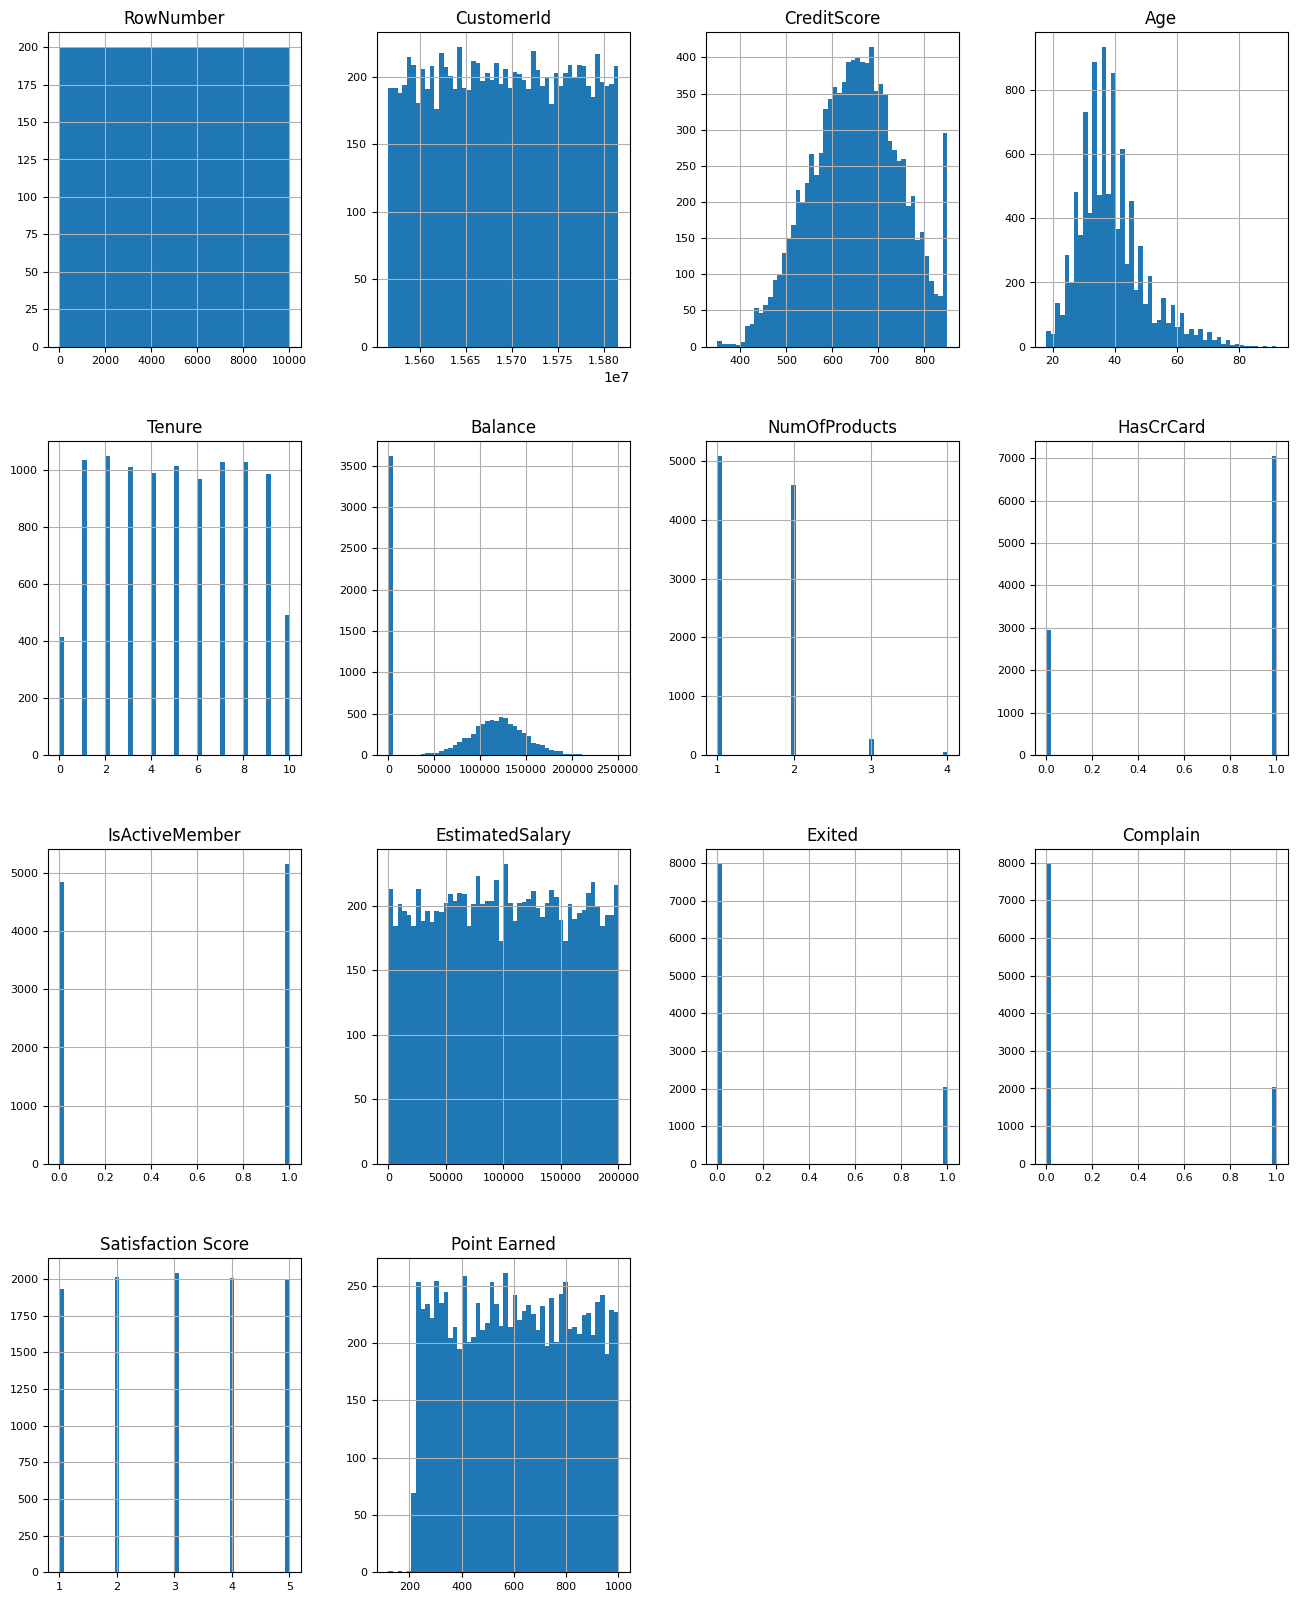

In [336]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [337]:
data.drop(columns = 'RowNumber', inplace=True)

In [338]:
for col in data.select_dtypes('object').columns:
    print(data[col].value_counts())
    print('\n')

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender
Male      5457
Female    4543
Name: count, dtype: int64


Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64




In [339]:
columns_to_convert = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score']

for column in columns_to_convert:
    data[column] = data[column].astype('object')

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  object 
 9   HasCrCard           10000 non-null  object 
 10  IsActiveMember      10000 non-null  object 
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  object 
 13  Complain            10000 non-null  object 
 14  Satisfaction Score  10000 non-null  object 
 15  Card Type           10000 non-null  object 
 16  Point

In [341]:
cat_cols=data.select_dtypes('object').columns
num_cols = data.select_dtypes(['int64', 'float64']).columns
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Surname', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type'],
      dtype='object')
Numerical Variables:
Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'EstimatedSalary', 'Point Earned'],
      dtype='object')


## EDA


### Univariate Analysis

CustomerId
Skew : 0.0


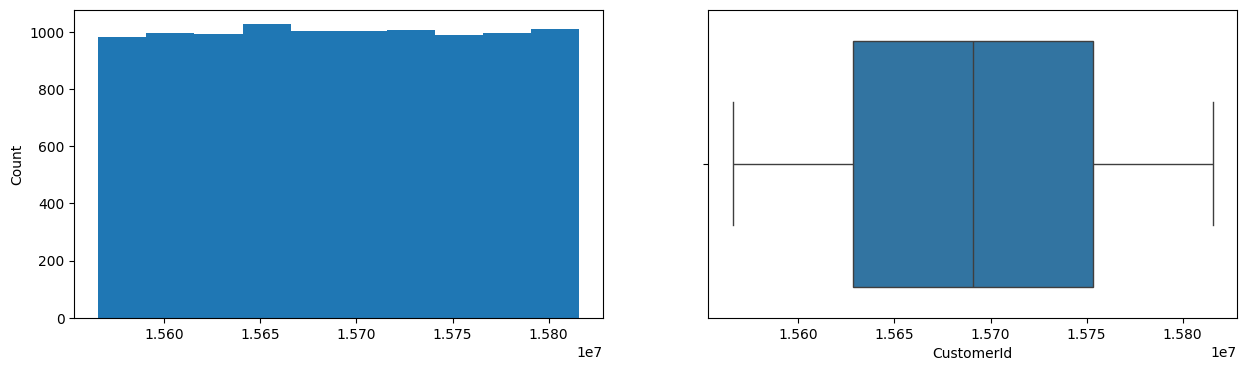

CreditScore
Skew : -0.07


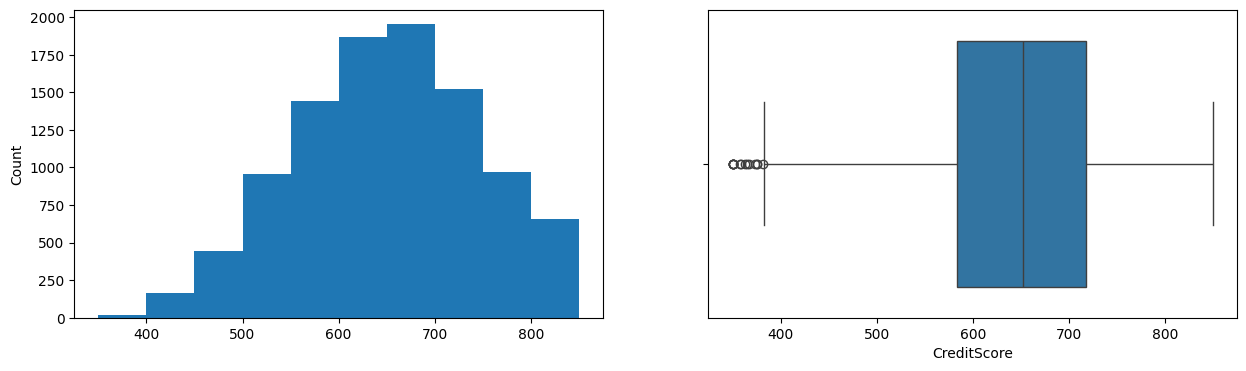

Age
Skew : 1.01


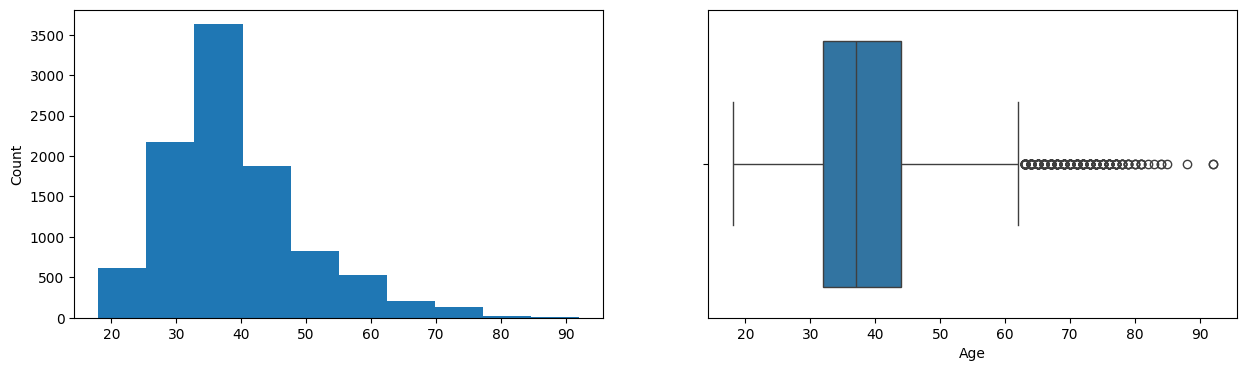

Tenure
Skew : 0.01


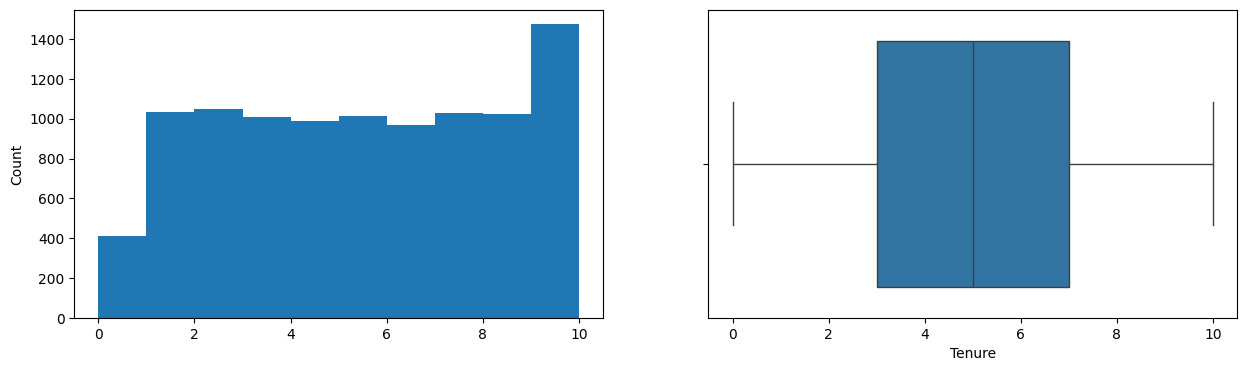

Balance
Skew : -0.14


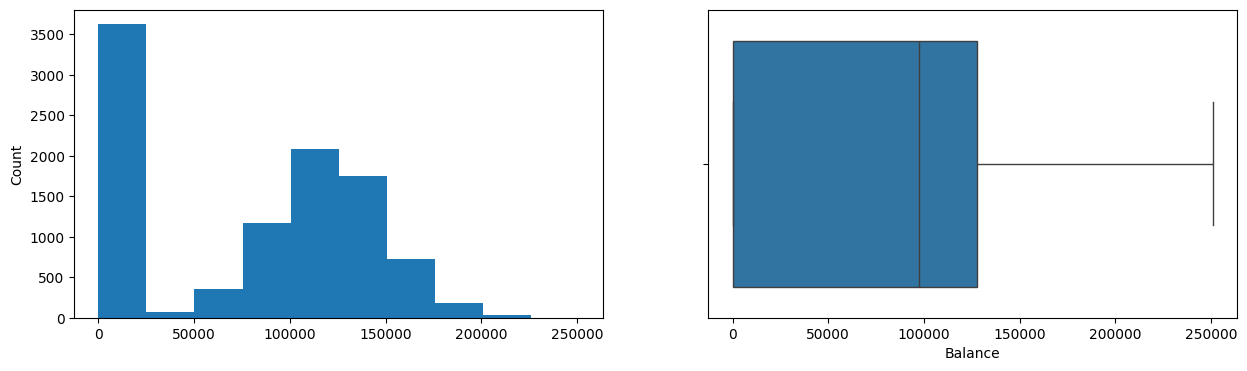

EstimatedSalary
Skew : 0.0


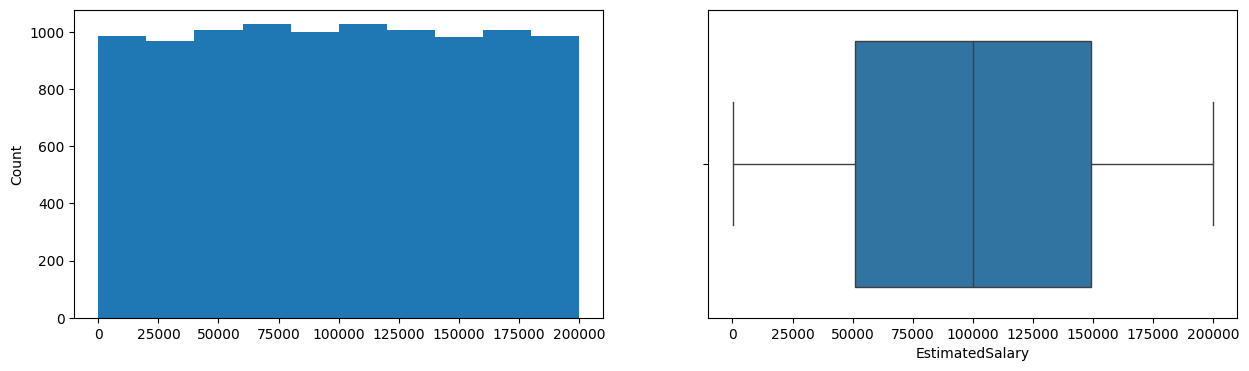

Point Earned
Skew : 0.01


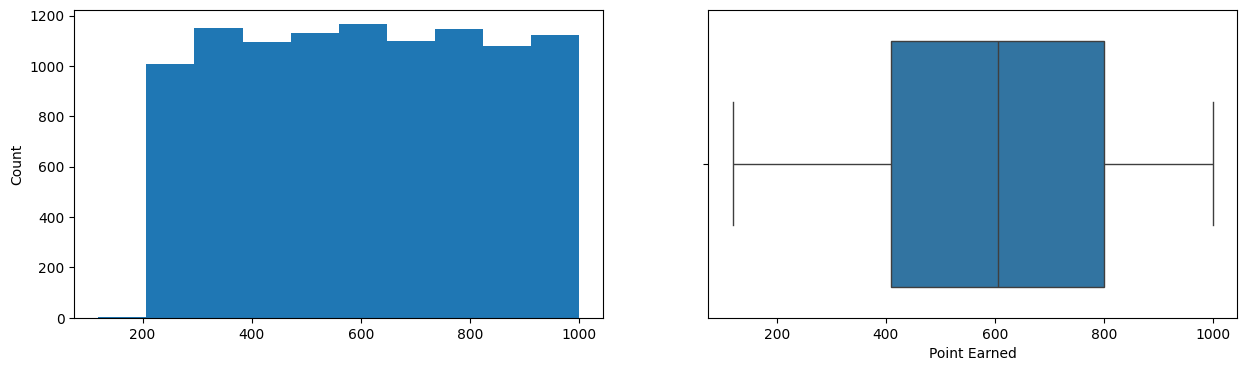

In [342]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#### Analysis

In [343]:
num_cols[0]

'CustomerId'

In [344]:
#Deleting 'CustomerId' because it's a identifier and have a uniform distribution
data.drop(columns='CustomerId', inplace=True)
num_cols = num_cols[num_cols != 'CustomerId']


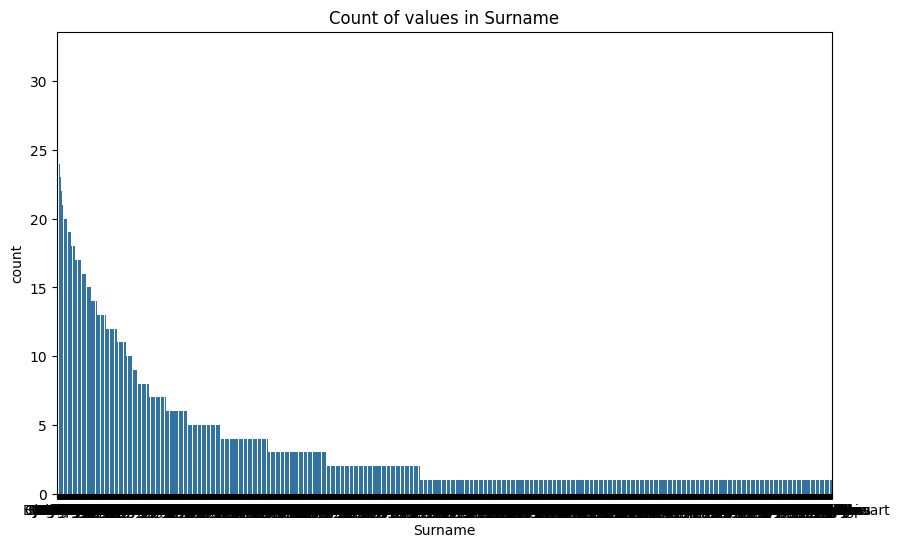

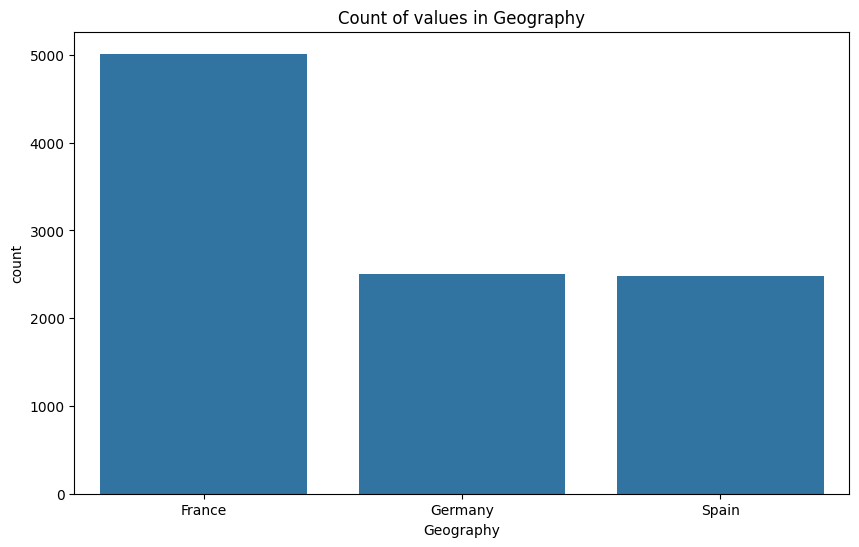

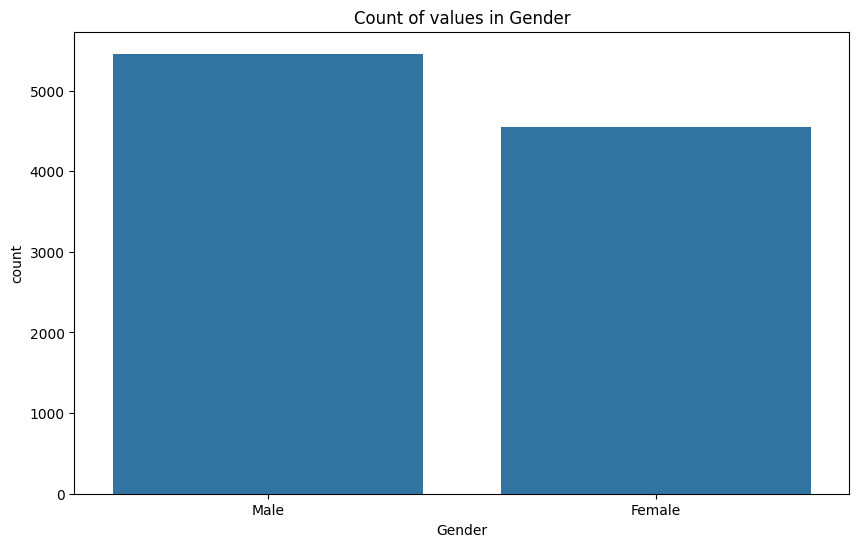

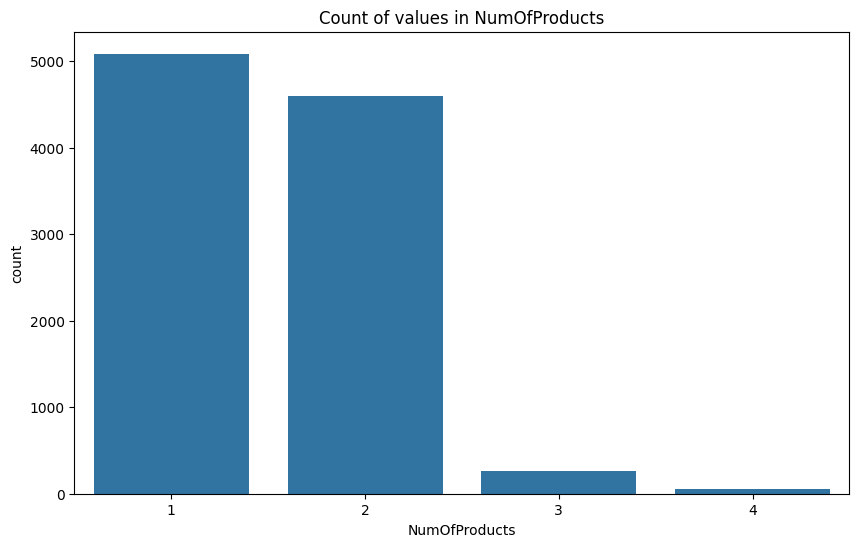

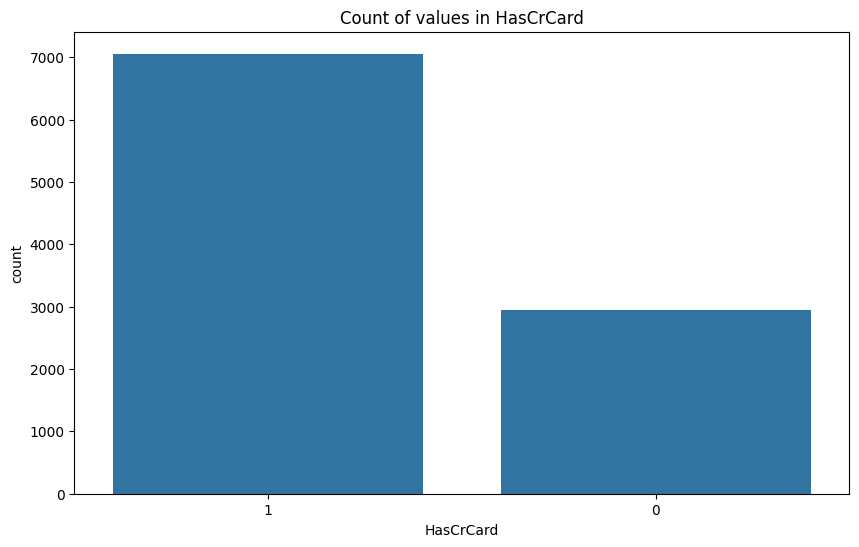

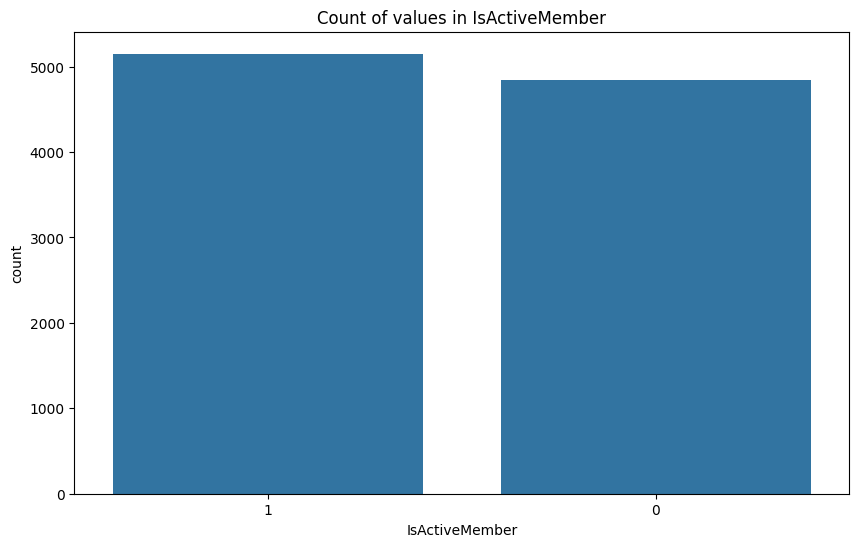

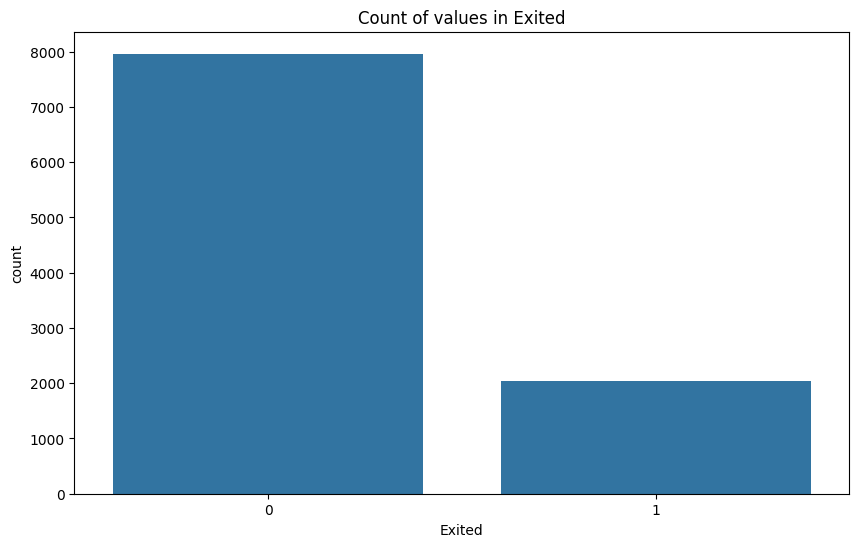

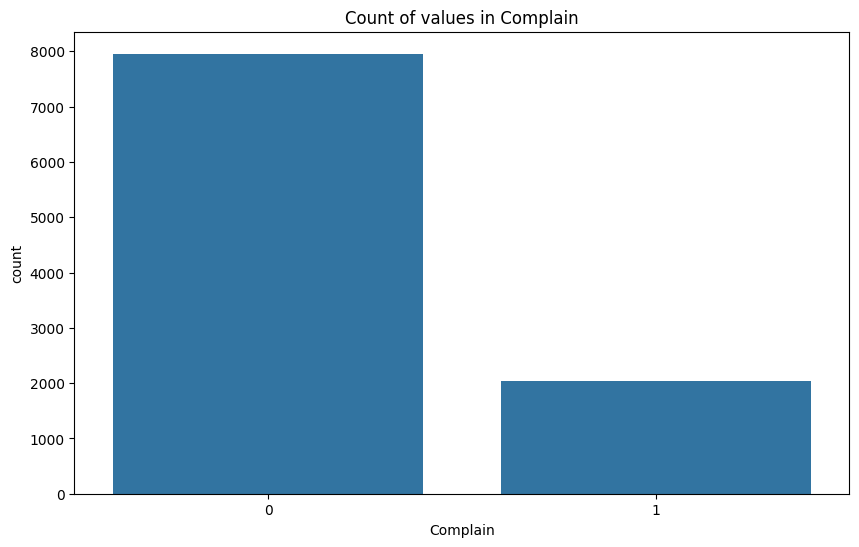

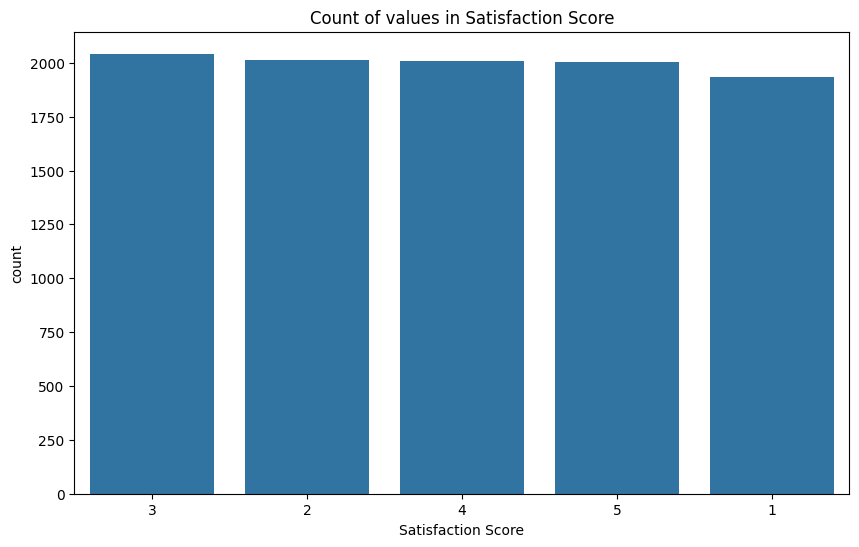

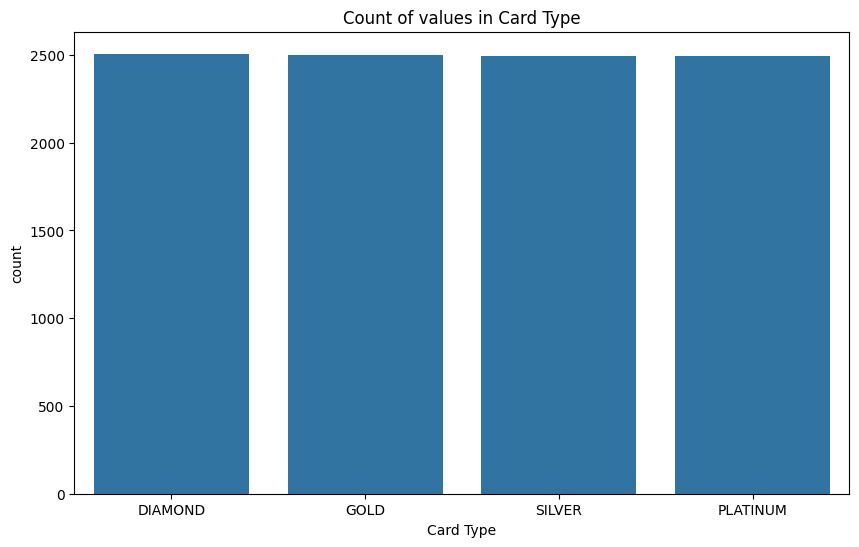

In [345]:
#Bar plot for all categorical variables in the dataset

for col in cat_cols:
    plt.figure(figsize=(10, 6)) 
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)  
    plt.title(f'Count of values in {col}')
    plt.show() 

In [346]:
data.drop(columns=['Surname'], inplace=True)
cat_cols = cat_cols[cat_cols != 'Surname']

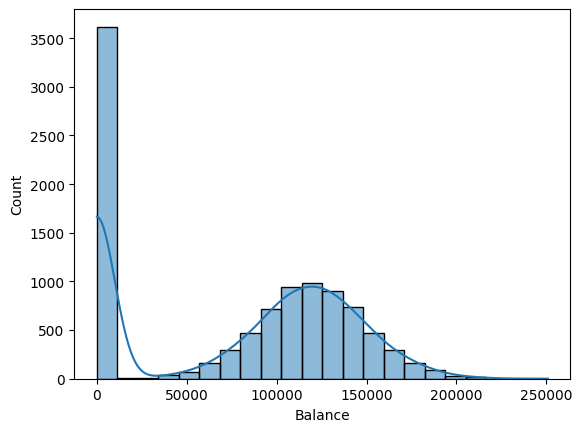

In [347]:
sns.histplot(data["Balance"], kde=True)
plt.show()

### Bivariate Analysis

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  object 
 7   HasCrCard           10000 non-null  object 
 8   IsActiveMember      10000 non-null  object 
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  object 
 11  Complain            10000 non-null  object 
 12  Satisfaction Score  10000 non-null  object 
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 1.1+ 

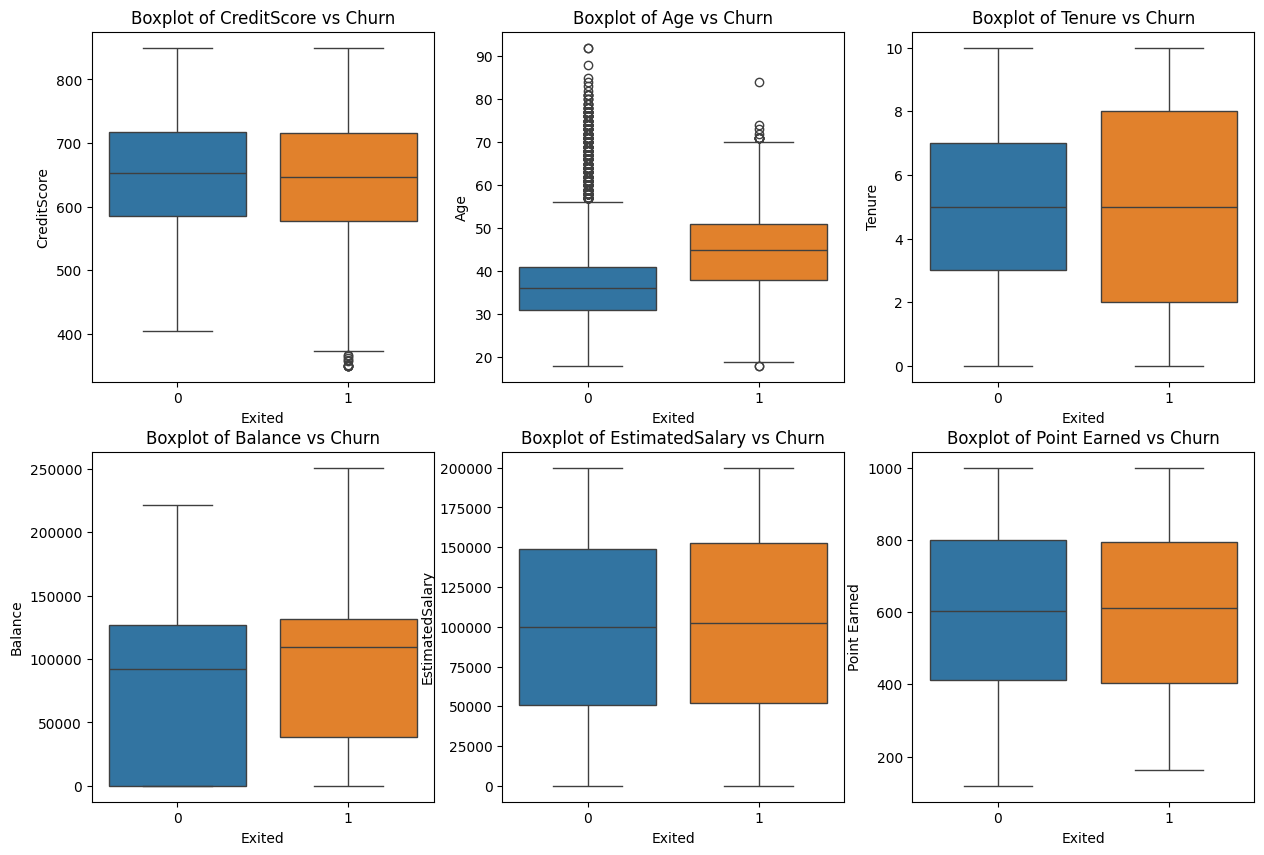

In [349]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x="Exited", y=col, data=data, ax=axs[i],hue="Exited",legend= False)
    axs[i].set_title("Boxplot of " + col + " vs Churn")

plt.show()

#### Analysis

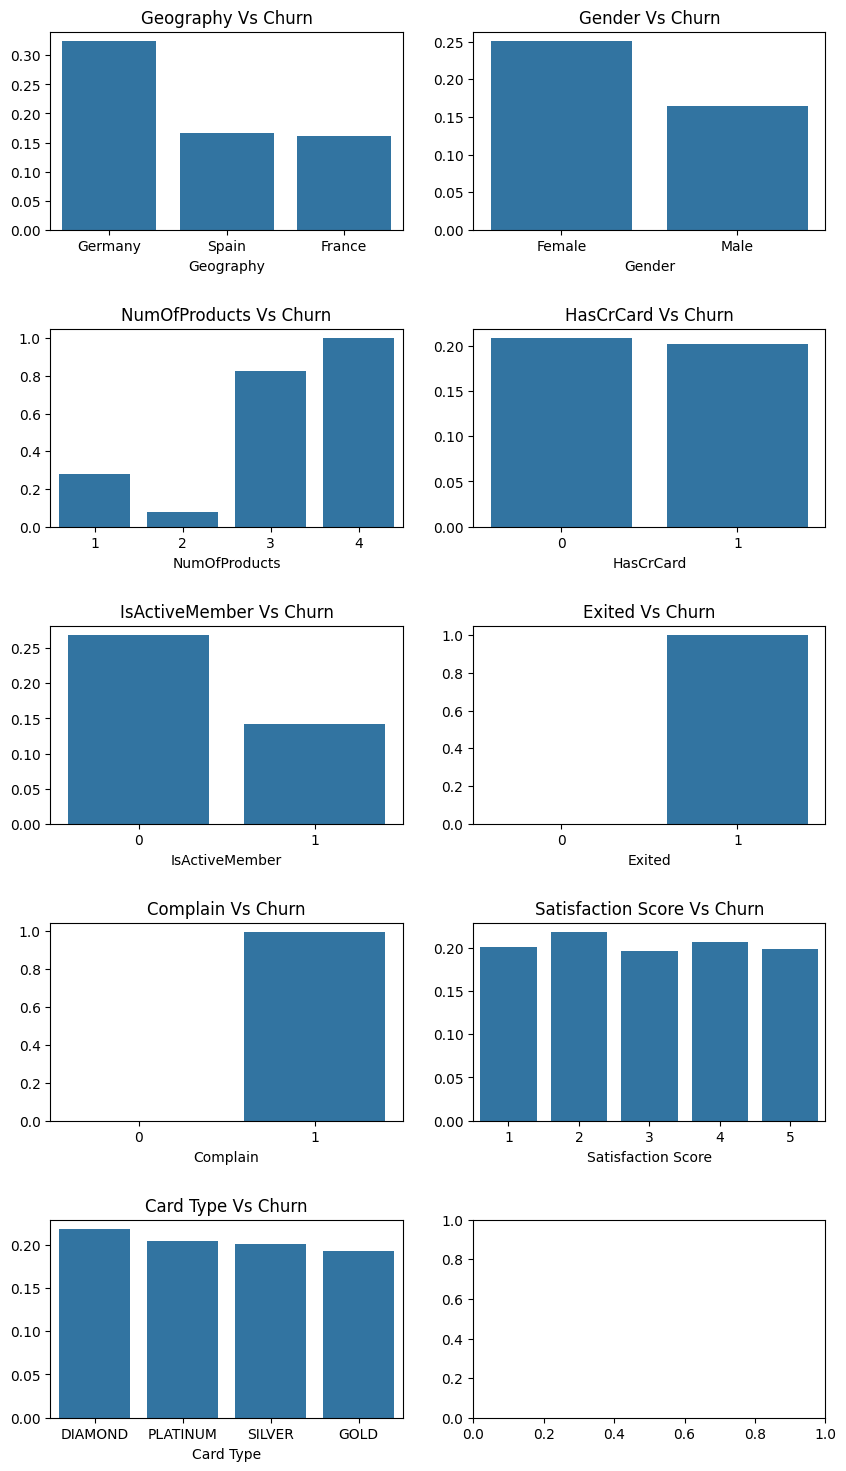

In [350]:
#Categorical features vs Churn
fig, axarr = plt.subplots(5, 2, figsize=(10, 18))

plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(cat_cols):
    
    mean_exited = data.groupby(col)['Exited'].mean().sort_values(ascending=False)
    
    sns.barplot(x=mean_exited.index, y=mean_exited.values, ax=axarr[i//2, i%2])

    axarr[i//2, i%2].set_title(f"{col} Vs Churn", fontsize=12)


plt.show()

### Multivariate Analysis

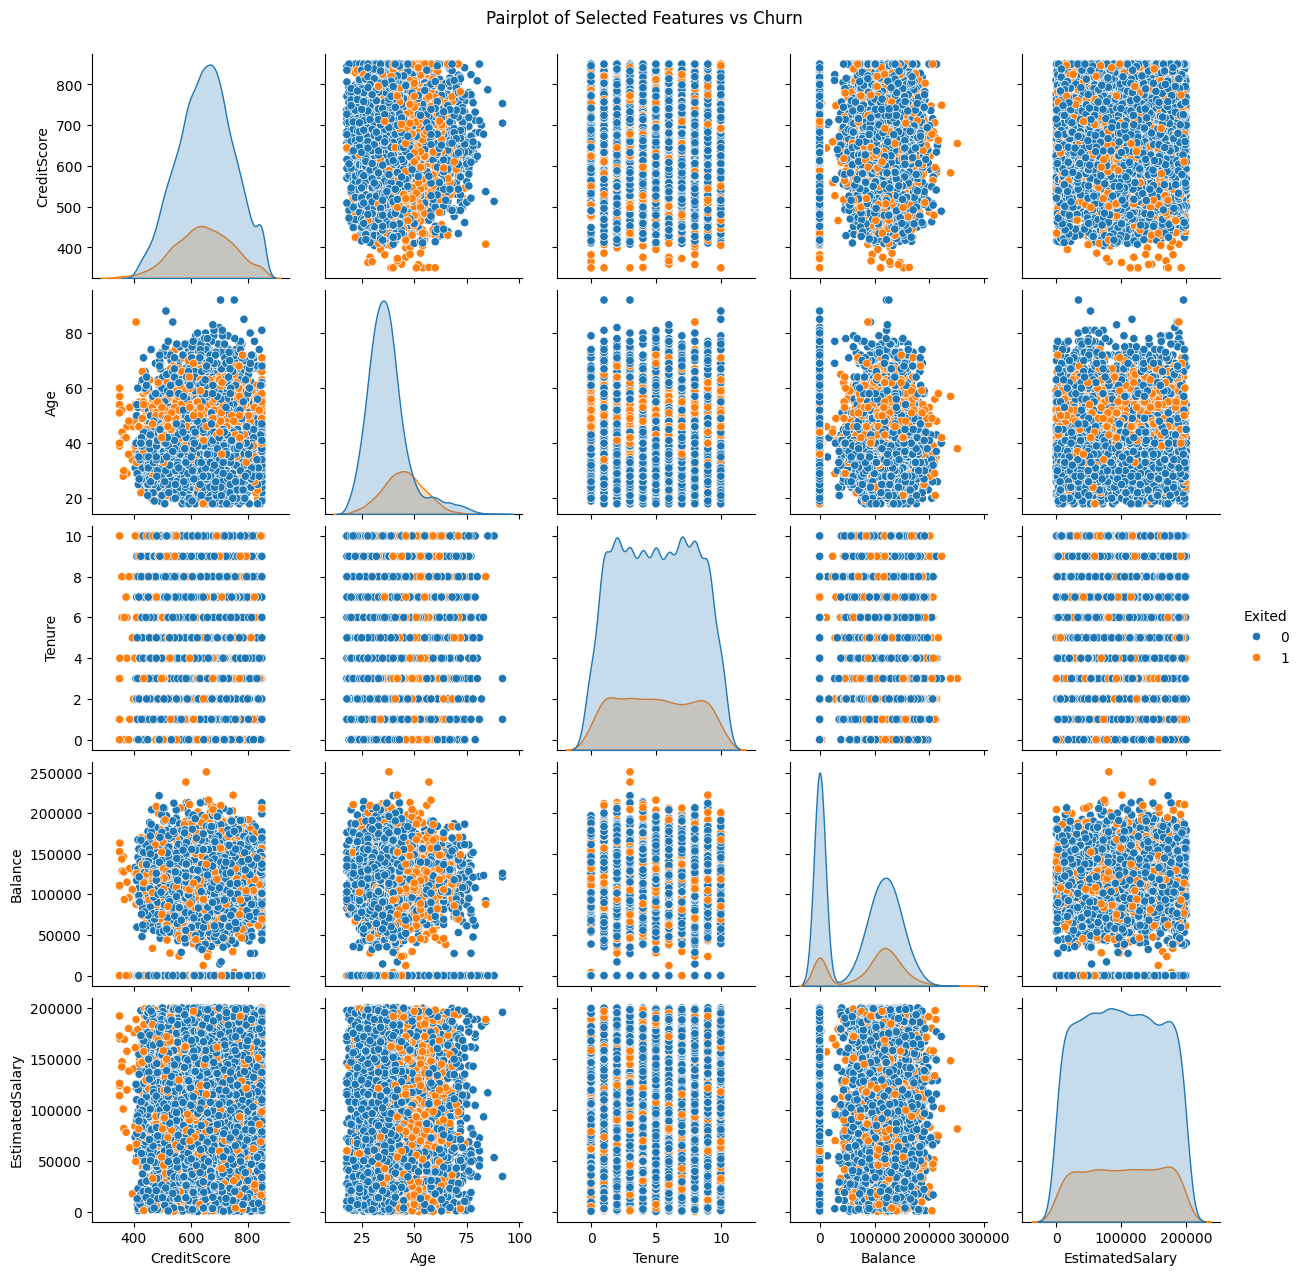

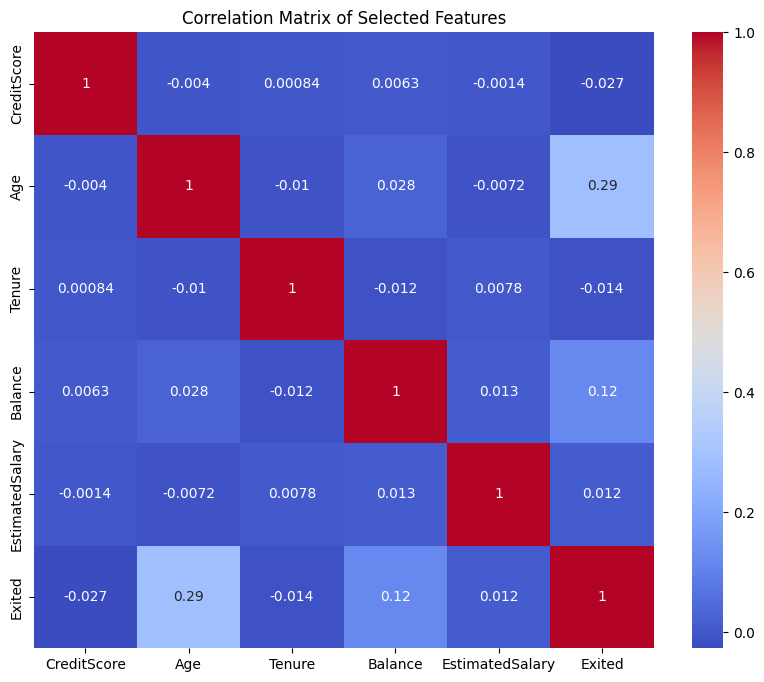

In [351]:
# Multivariate Analysis - Pairplot for selected numerical features against Churn
selected_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(data[selected_features], hue='Exited', height=2.5)
plt.suptitle('Pairplot of Selected Features vs Churn', y=1.02)
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data[selected_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [352]:
data.drop(columns=['Complain'], inplace=True)

## Validation techniques

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  object 
 7   HasCrCard           10000 non-null  object 
 8   IsActiveMember      10000 non-null  object 
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  object 
 11  Satisfaction Score  10000 non-null  object 
 12  Card Type           10000 non-null  object 
 13  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 1.1+ MB


In [354]:
data['Gender'].replace({'Male': 0 , 'Female': 1}, inplace=True)

In [355]:
ohencoder = ce.OneHotEncoder(cols=['Geography'], use_cat_names=True)

ordencoder = ce.ordinal.OrdinalEncoder(
    cols=["Card Type"],
    mapping=[{
        "col": "Card Type",
        "mapping": {
            'DIAMOND': 0,
            'GOLD': 1,
            'SILVER': 2,
            'PLATINUM': 3
        }
    }]
)

In [356]:
data = ordencoder.fit_transform(data)

In [357]:
# Splitting the data into train and test
X = data.drop(columns='Exited')
y = data['Exited'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7)


In [358]:
print(f"Train data size: {len(X_train)}\nTest data size: {len(X_test)}")
print(f"Train data size: {len(y_train)}\nTest data size: {len(y_test)}")

Train data size: 7000
Test data size: 3000
Train data size: 7000
Test data size: 3000


In [359]:
ohe_X_train = ohencoder.fit_transform(X_train)
ohe_X_test = ohencoder.transform(X_test)

In [360]:
print(f"Train data size: {len(ohe_X_train)}\nTest data size: {len(ohe_X_test)}")
print(f"Train data size: {len(ohe_X_test)}\nTest data size: {len(ohe_X_test)}")

Train data size: 7000
Test data size: 3000
Train data size: 3000
Test data size: 3000


## Classification model

In [361]:
rfc = RandomForestClassifier()

rfc.fit(ohe_X_train, y_train)
print(rfc.score(ohe_X_train, y_train))
print(rfc.score(ohe_X_test, y_test))

1.0
0.8633333333333333


In [362]:
rfc.feature_importances_

array([0.10230323, 0.00930947, 0.01074171, 0.01923604, 0.01829098,
       0.21251201, 0.06223185, 0.10789752, 0.11473891, 0.01632487,
       0.03711188, 0.10725518, 0.0428578 , 0.03713534, 0.10205321])

## Metrics

In [363]:
print('F1 score = %1.3f' % f1_score(y_pred=rfc.predict(ohe_X_test), y_true=y_test))

F1 score = 0.571


Hmmm doesn't seems a good metric...

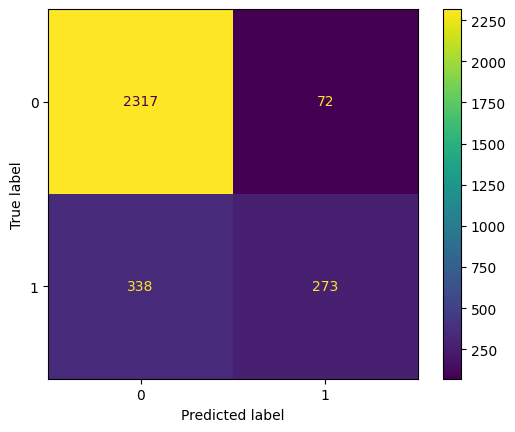

In [364]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=rfc.predict(ohe_X_test))

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

So it predicted that 2317 times the client exited the company when he really exited the company and wrong 72 times. <br>
The time the client exited the company, the model was wrong 338 timesand right 273 times.



## Outliers detection and elimination

In [365]:
# evaluate the model
y_hat = rfc.predict(ohe_X_test)
mae = mean_absolute_error(y_test, y_hat)
print('MAE: %.5f' % mae)

MAE: 0.13667


#### Using Isolation Forest technique

In [366]:
# summarize the shape of the training dataset
print(ohe_X_train.shape, y_train.shape)

# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(ohe_X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train_iso, y_train_iso = ohe_X_train[mask], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train_iso.shape, y_train_iso.shape)

# fit the model
model = RandomForestClassifier()
model.fit(X_train_iso, y_train_iso)
# evaluate the model
y_iso = model.predict(ohe_X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_iso)
print('MAE: %.5f' % mae)

(7000, 15) (7000,)
(6300, 15) (6300,)
MAE: 0.14400


After reducing the data from 7000 to 6300 ,by deleting the outliers, the model has not improved.

#### Using Local Outlier Factor technique

In [367]:
# summarize the shape of the training dataset
print(ohe_X_train.shape, y_train.shape)

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(ohe_X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train_lof, y_train_lof = ohe_X_train[mask], y_train[mask]

# summarize the shape of the updated training dataset
print(X_train_lof.shape, y_train_lof.shape)

# fit the model
model = RandomForestClassifier()
model.fit(X_train_lof, y_train_lof)
# evaluate the model
yhat = model.predict(ohe_X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.5f' % mae)

(7000, 15) (7000,)
(6979, 15) (6979,)
MAE: 0.13233


But now, using the LocalOutlierFactor technique, the model has improved its performance. So this technique is better than the Isolation Forest technique in this case.

## Feature selection

In [368]:
accuracy = accuracy_score(rfc.predict(ohe_X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(ohe_X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.8633333333333333


C:\Users\Hernani\AppData\Local\Temp\ipykernel_12524\588080609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfc.feature_importances_, y=ohe_X_train.columns, palette='coolwarm')


Text(0, 0.5, 'Feature')

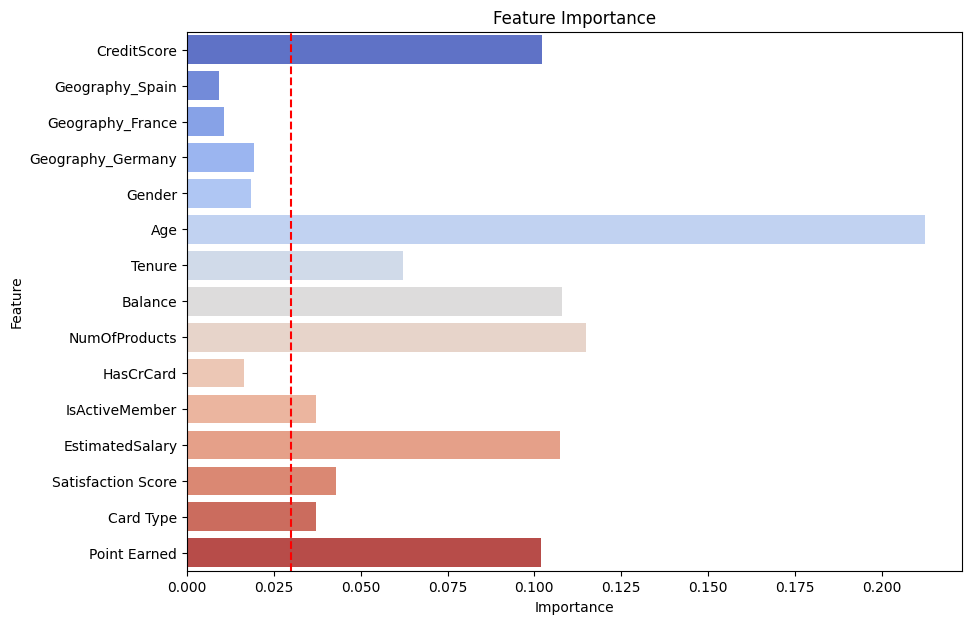

In [369]:
plt.figure(figsize=(10,7))

sns.barplot(x=rfc.feature_importances_, y=ohe_X_train.columns, palette='coolwarm')
plt.axvline(x=0.03, color='r', linestyle='--')

plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature') 

In [370]:
# Droping the features that has importance below 0.03
feature_selected_X = ohe_X_train.drop(columns=['Geography_France', 'Geography_Germany','Geography_Spain', 'Gender','HasCrCard'])

In [371]:
X_train, X_test, y_train, y_test = train_test_split(feature_selected_X, y_train, stratify=y_train, train_size=0.7)

In [372]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

rfc.feature_importances_

array([0.12150145, 0.21134354, 0.06679554, 0.11849645, 0.13236678,
       0.03378112, 0.12154046, 0.04098664, 0.03804334, 0.11514468])

In [373]:
accuracy = accuracy_score(rfc.predict(X_test),y_test)
output = pd.DataFrame(data = np.column_stack((rfc.predict(X_test),y_test)),columns=['Pred','Target'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.8552380952380952


After the feature selection the model trained has a slightly better accuracy.